# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [1]:
!pip install citipy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
!pip install openweathermapy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy as ow
from datetime import date
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Todays_Date = date.today()
print(Todays_Date)


2018-10-24


## Generate Cities List

In [97]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [98]:
# Base Url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
# Build query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=


In [99]:
# Lists for data
CityName = []
Cloudiness = []
Country = []
Date = []
Humdity = []
Lat = []
Lng = []
MaxTemp = []
MinTemp = []
WindSpeed = []

# Counter to get at least 500 records 
record = 1 
record_counter = 500

# Processing data for each city and add to lists
for city in cities:
    try: 
        print(f"Processing record {record} of Set {record} | {city}")
        weather_response = requests.get(query_url + city).json()
        CityName.append(weather_response["name"])
        Cloudiness.append(weather_response["clouds"]["all"])
        Country.append(weather_response["sys"]["country"])
        Date.append(weather_response["dt"])
        Humdity.append(weather_response["main"]["humidity"])
        Lat.append(weather_response["coord"]["lat"])
        Lng.append(weather_response["coord"]["lon"])
        MaxTemp.append(weather_response["main"]["temp_max"])
        MinTemp.append(weather_response["main"]["temp_min"])
        WindSpeed.append(weather_response["wind"]["speed"])
    except (KeyError, IndexError):
        print("City isn't available")
    
    # Need at least 500 so add more 
    finally:
        if record < (record_counter*1.15):
              record = record + 1
        else:
            break
     
                     
      

Processing record 1 of Set 1 | hobart
Processing record 2 of Set 2 | cidreira
Processing record 3 of Set 3 | rikitea
Processing record 4 of Set 4 | kapaa
Processing record 5 of Set 5 | khatanga
Processing record 6 of Set 6 | muyezerskiy
Processing record 7 of Set 7 | mahebourg
Processing record 8 of Set 8 | punta arenas
Processing record 9 of Set 9 | egvekinot
Processing record 10 of Set 10 | bambous virieux
Processing record 11 of Set 11 | amalapuram
Processing record 12 of Set 12 | avera
Processing record 13 of Set 13 | marcona
City isn't available
Processing record 14 of Set 14 | omsukchan
Processing record 15 of Set 15 | ribeira grande
Processing record 16 of Set 16 | pampierstad
Processing record 17 of Set 17 | attawapiskat
City isn't available
Processing record 18 of Set 18 | bluff
Processing record 19 of Set 19 | roma
Processing record 20 of Set 20 | torbay
Processing record 21 of Set 21 | amderma
City isn't available
Processing record 22 of Set 22 | klaksvik
Processing record 2

Processing record 181 of Set 181 | khani
Processing record 182 of Set 182 | orikhiv
Processing record 183 of Set 183 | esperance
Processing record 184 of Set 184 | jamestown
Processing record 185 of Set 185 | cabra
Processing record 186 of Set 186 | vardo
Processing record 187 of Set 187 | tura
Processing record 188 of Set 188 | ust-nera
Processing record 189 of Set 189 | carnarvon
Processing record 190 of Set 190 | gazanjyk
Processing record 191 of Set 191 | sitka
Processing record 192 of Set 192 | burnie
Processing record 193 of Set 193 | evensk
Processing record 194 of Set 194 | barentsburg
City isn't available
Processing record 195 of Set 195 | butaritari
Processing record 196 of Set 196 | kavieng
Processing record 197 of Set 197 | dromolaxia
Processing record 198 of Set 198 | nome
Processing record 199 of Set 199 | mattru
Processing record 200 of Set 200 | saint-augustin
Processing record 201 of Set 201 | humboldt
Processing record 202 of Set 202 | leh
Processing record 203 of Set

Processing record 362 of Set 362 | normandin
Processing record 363 of Set 363 | bratslav
Processing record 364 of Set 364 | srandakan
Processing record 365 of Set 365 | samusu
City isn't available
Processing record 366 of Set 366 | nabire
Processing record 367 of Set 367 | richards bay
Processing record 368 of Set 368 | varhaug
Processing record 369 of Set 369 | maragogi
Processing record 370 of Set 370 | port hardy
Processing record 371 of Set 371 | kirovsk
Processing record 372 of Set 372 | pochutla
Processing record 373 of Set 373 | sao joao da barra
Processing record 374 of Set 374 | tornio
Processing record 375 of Set 375 | rocha
Processing record 376 of Set 376 | karaul
City isn't available
Processing record 377 of Set 377 | saskylakh
Processing record 378 of Set 378 | wagga wagga
Processing record 379 of Set 379 | pacific grove
Processing record 380 of Set 380 | ginda
Processing record 381 of Set 381 | vilhena
Processing record 382 of Set 382 | suzun
Processing record 383 of Set

Processing record 540 of Set 540 | saint-francois
Processing record 541 of Set 541 | ahumada
City isn't available
Processing record 542 of Set 542 | thisted
Processing record 543 of Set 543 | zwickau
Processing record 544 of Set 544 | peniche
Processing record 545 of Set 545 | port lincoln
Processing record 546 of Set 546 | moquegua
Processing record 547 of Set 547 | porto uniao
Processing record 548 of Set 548 | fort nelson
Processing record 549 of Set 549 | abdanan
Processing record 550 of Set 550 | rosarito
Processing record 551 of Set 551 | kiunga
Processing record 552 of Set 552 | esna
Processing record 553 of Set 553 | okhotsk
Processing record 554 of Set 554 | lulea
Processing record 555 of Set 555 | tuatapere
Processing record 556 of Set 556 | sao jose de piranhas
Processing record 557 of Set 557 | te anau
Processing record 558 of Set 558 | melendugno
Processing record 559 of Set 559 | sobolevo
Processing record 560 of Set 560 | cherskiy
Processing record 561 of Set 561 | valle


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [102]:
# Create dataframe and countin records to make sure they match
weather = {"City" : CityName, "Cloudiness" : Cloudiness, "Country" : Country, "Date" : Date, "Humidity" : Humdity, 
           "Lat" : Lat, "Lng" : Lng, "Max Temp" : MaxTemp, "Wind Speed" : WindSpeed}

weather_df = pd.DataFrame(weather)
weather_df.count()


City          527
Cloudiness    527
Country       527
Date          527
Humidity      527
Lat           527
Lng           527
Max Temp      527
Wind Speed    527
dtype: int64

In [103]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hobart,75,AU,1540378800,62,-42.88,147.33,51.80,5.82
1,Cidreira,12,BR,1540381788,75,-30.17,-50.22,68.37,15.12
2,Rikitea,92,PF,1540381456,100,-23.12,-134.97,70.04,17.69
3,Kapaa,90,US,1540378560,74,22.08,-159.32,78.80,16.11
4,Khatanga,0,RU,1540381483,54,71.98,102.47,-4.53,3.94


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

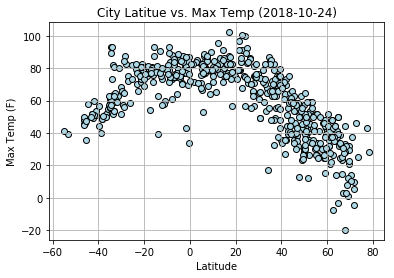

In [112]:
# Titles, grid and labels
plt.title(f"City Latitue vs. Max Temp ({Todays_Date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)

# Creating Scatterplots
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], label = "Rural", marker="o", 
            edgecolor="black", linewidth=1, color="lightblue")

# Saving file
plt.savefig("../Images/TempScatter.png")



#### Latitude vs. Humidity Plot

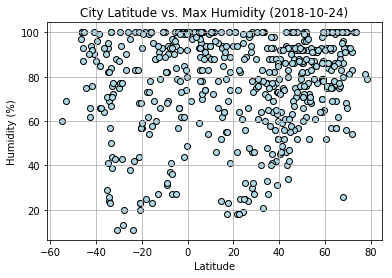

In [113]:
# Titles, grid and labels
plt.title(f"City Latitude vs. Max Humidity ({Todays_Date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Creating Scatterplots
plt.scatter(weather_df["Lat"], weather_df["Humidity"], label = "Rural", marker="o", 
            edgecolor="black", linewidth=1, color="lightblue")

# Saving file
plt.savefig("../Images/Humidity_Scatter.png")

#### Latitude vs. Cloudiness Plot

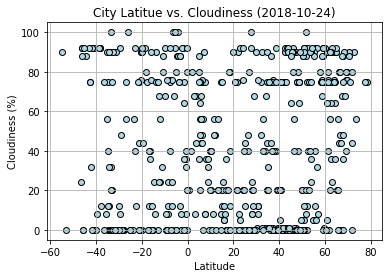

In [114]:
# Titles, grid and labels
plt.title(f"City Latitue vs. Cloudiness ({Todays_Date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Creating Scatterplots
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], label = "Rural", marker="o", 
            edgecolor="black", linewidth=1, color="lightblue")

# Saving file
plt.savefig("../Images/Cloudiness_Scatter.png")

#### Latitude vs. Wind Speed Plot

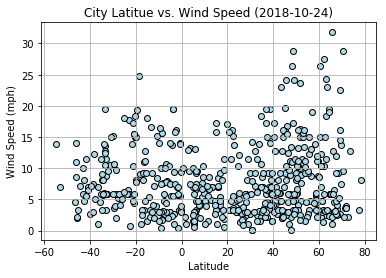

In [115]:
# Titles, grid and labels
plt.title(f"City Latitue vs. Wind Speed ({Todays_Date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Creating Scatterplots
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], label = "Rural", marker="o", 
            edgecolor="black", linewidth=1, color="lightblue")

# Saving file
plt.savefig("../Images/Wind_Scatter.png")